In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [ ]:
# 모델 불러오기
model=load_model("../../src/models/01_Basic_Model/drowsiness_mediapipe_model_first.keras")

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

test_generator=test_datagen.flow_from_directory(
    "../../data/processed/01_kaggle_dataset/cropped_dataset_Mediapipe/test",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode="categorical",
    shuffle=False
)

Y_pred=model.predict(test_generator)
y_pred=np.argmax(Y_pred, axis=1)
y_true=test_generator.classes

Found 433 images belonging to 4 classes.
28/28 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step


              precision    recall  f1-score   support

      Closed       0.96      0.99      0.98       109
        Open       0.99      0.96      0.98       109
     no_yawn       1.00      0.98      0.99       109
        yawn       0.98      1.00      0.99       106

    accuracy                           0.98       433
   macro avg       0.98      0.98      0.98       433
weighted avg       0.98      0.98      0.98       433



<Axes: >

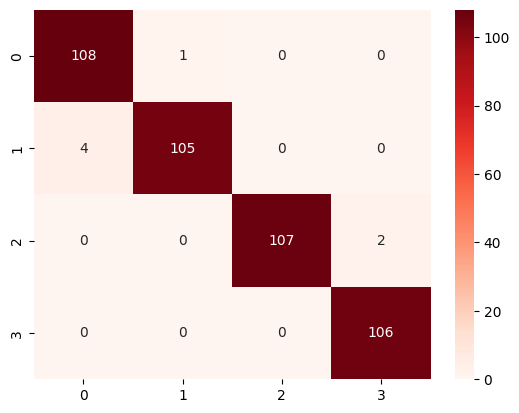

In [ ]:
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", cmap="Reds")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


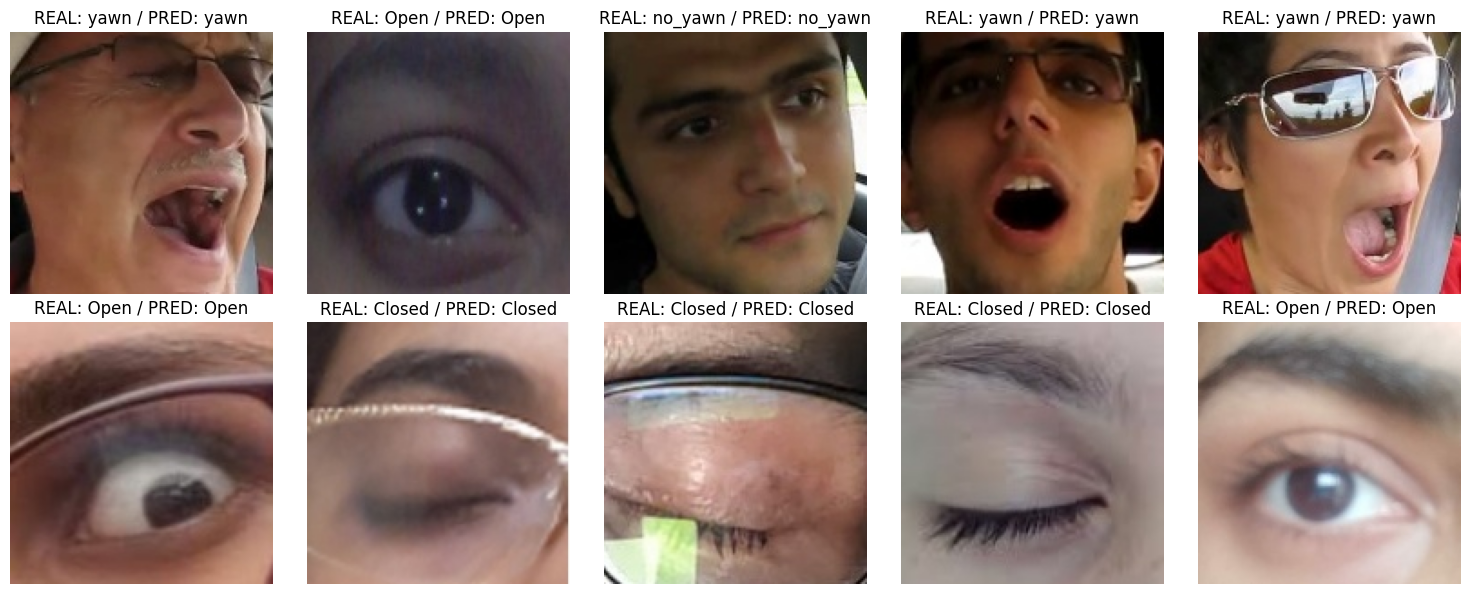

In [ ]:
import random

X_all=[]
y_all=[]

# 전체 test 세트에서 이미지와 레이블 수집
for i in range(len(test_generator)):
    x_batch, y_batch=test_generator[i]
    X_all.append(x_batch)
    y_all.append(y_batch)

# X_all과 y_all을 numpy 배열로 변환
X_all=np.vstack(X_all)
y_all=np.vstack(y_all)
y_true=np.argmax(y_all, axis=1)

# 이미지 크기와 배치 크기 설정
class_names=list(test_generator.class_indices.keys())

# 랜덤 10장
indices=random.sample(range(len(X_all)), 10)
selected_images=X_all[indices]
selected_labels=y_true[indices]

# 예측
pred_probs=model.predict(selected_images)
pred_labels=np.argmax(pred_probs, axis=1)

# 시각화
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(selected_images[i])
    plt.axis("off")
    true_label=class_names[selected_labels[i]]
    pred_label=class_names[pred_labels[i]]
    plt.title(f"REAL: {true_label} / PRED: {pred_label}")
plt.tight_layout()
plt.show()